In [51]:
from utils.bayes import bayesPredict
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import test_result
from utils.mean_variance import *
import os
%load_ext autoreload
%autoreload 2

crt_dir = os.path.abspath("")
data_dir = os.path.abspath("data")
file1 = os.path.join(data_dir, "000300.csv")
file2 = os.path.join(data_dir, "Monthly_Excess_Return_Rates.csv")
CSI300_df = pd.read_csv(file1, index_col=1, parse_dates=True)['Idxrtn']
excessR_df = pd.read_csv(file2)
bayesR_df = bayesPredict(excessR_df, agent_type=0.3)
print('Bayes prediction:')
bayesR_df.tail()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Bayes prediction:


,600000,600009,600010,600015,600016,600019,600028,600029,600030,600031,...,601398,601600,601601,601628,601766,601857,601899,601939,601988,601998
Trdmnt,,,,,,,,,,,,,,,,,,,,,
2022-07-01,-0.016220,0.010233,-0.055471,-0.004914,-0.005235,-0.048798,-0.001415,0.011722,-0.021692,-0.039624,...,-0.000506,-0.059848,-0.019642,-0.005818,-0.032741,-0.008359,-0.025279,-0.001417,0.002920,-0.004268
2022-08-01,-0.020192,0.001249,-0.043944,-0.006201,-0.005958,-0.040433,-0.007111,-0.002810,-0.030352,-0.047483,...,-0.003634,-0.060758,-0.032381,-0.016837,-0.024927,-0.018196,-0.019991,-0.005642,0.003035,-0.005546
2022-09-01,-0.019466,-0.004114,-0.043649,-0.006826,-0.006569,-0.031758,0.001601,-0.013850,-0.030361,-0.045175,...,-0.003832,-0.043189,-0.029901,-0.008528,-0.019727,-0.011198,-0.024615,-0.005874,0.002344,-0.002510
2022-10-01,-0.017546,0.016747,-0.054031,-0.009245,-0.013251,-0.024420,0.011743,-0.003777,-0.033372,-0.052754,...,-0.002519,-0.036187,-0.031646,-0.005100,-0.028718,0.000974,-0.033076,-0.002792,0.003909,0.000128
2022-11-01,-0.023811,0.002605,-0.054849,-0.013870,-0.016155,-0.036772,0.001067,-0.016347,-0.043356,-0.058853,...,-0.008349,-0.055948,-0.037598,-0.022409,-0.027619,-0.007501,-0.027925,-0.007898,0.000984,-0.007878


In [52]:
#excessR_df.index = pd.to_datetime(excessR_df['Trdmnt'])
excessR_df = pd.read_csv(file2, index_col=0, parse_dates=True)
excessR_df = excessR_df.fillna(0)
rf_df = pd.read_csv(os.path.join(data_dir, "Monthly_rf_Rates.csv"), index_col=0, parse_dates=True)
rf_df = rf_df.fillna(0)
R_df = pd.read_csv(os.path.join(data_dir, "Monthly_Return_Rates.csv"), index_col=0, parse_dates=True)
R_df = R_df.fillna(0)
print('Excess return (true data)')
excessR_df.tail()

Excess return (true data)


,600000,600009,600010,600015,600016,600019,600028,600029,600030,600031,...,601398,601600,601601,601628,601766,601857,601899,601939,601988,601998
Trdmnt,,,,,,,,,,,,,,,,,,,,,
2022-07-01,-0.044177,-0.091541,-0.039539,-0.018516,-0.022746,-0.059381,0.006112,-0.125728,-0.096347,-0.107222,...,-0.023287,-0.018083,-0.103647,-0.084043,-0.010857,-0.020109,-0.044113,-0.023507,0.006556,-0.020058
2022-08-01,0.000136,0.092594,-0.111860,0.002665,-0.012230,-0.061206,0.037689,0.005009,0.022398,-0.076945,...,-0.001241,-0.028663,0.037392,0.100302,0.006736,0.025682,-0.015799,-0.010218,-0.007777,0.026282
2022-09-01,-0.032878,0.022864,-0.085818,-0.022642,-0.059574,-0.014374,0.041899,0.029815,-0.108823,-0.119971,...,-0.008090,-0.085498,-0.031761,0.029052,-0.065113,-0.002847,-0.110332,-0.001241,0.015206,0.016616
2022-10-01,-0.058059,-0.077392,-0.044719,-0.048955,-0.027790,-0.054707,-0.052523,-0.028350,-0.013296,-0.028619,...,-0.047218,-0.066616,-0.065186,-0.160267,0.011552,-0.067518,0.008963,-0.033850,-0.027131,-0.051680
2022-11-01,0.086108,0.038100,0.129441,0.092705,0.065426,0.171316,0.111781,0.152010,0.150415,0.177278,...,0.034904,0.156790,0.277792,0.357782,0.127180,0.092705,0.239921,0.045575,0.045270,0.160422


In [81]:
constraint_list = [cons_non_negative_weight(), cons_sum_weight_upper_bound(1)]
R_excess_hat, w_hat = portfolio2(Bayes_df=bayesR_df, R_excess_df=excessR_df, momentum_period=2, rank=20, momentum_atLeast=0.05, num_atLeast=2, objective=obj_Exp, constraints=constraint_list)

In [82]:
R_net_hat = np.sum(R_excess_hat, axis=1) + \
    rf_df[rf_df.index >= pd.Timestamp("2017")].values.reshape(-1,)
R_net_hat_df = pd.DataFrame(R_net_hat, columns=[
                            'return'], index=CSI300_df[CSI300_df.index >= pd.Timestamp("2017")].index)

test_result.calculate_result(R_net_hat_df, rf_df[rf_df.index >= pd.Timestamp("2017")])

,accu_return,annual_return,annual_vol,sharpe_ratio,max_dd,winning_rate,karmar
0,1.338057,0.154361,2.927744,0.049308,-0.443119,0.647887,3.019634


In [65]:
ew_rets = pd.DataFrame(np.sum(
    1.0*R_df[R_df.index >= pd.Timestamp("2017")]/R_df.shape[1], axis=1), columns=['return'])
rf_rets = pd.DataFrame(
    rf_df[rf_df.index.year>=2017].values, columns=['return'], index=CSI300_df[CSI300_df.index >= pd.Timestamp("2017")].index
)

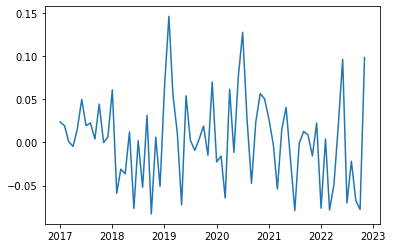

In [70]:
plt.plot(CSI300_df[CSI300_df.index.year >= 2017])

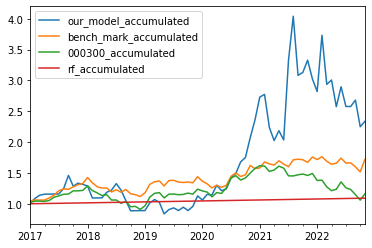

In [83]:
p_cum = (R_net_hat_df['return'] + 1).cumprod()
ew_cum = (ew_rets['return'] + 1).cumprod()
CSI300_cumrets = (CSI300_df[CSI300_df.index.year >= 2017] + 1).cumprod()
rf_cumrets = (rf_rets+1).cumprod()
pd.concat([p_cum, ew_cum, CSI300_cumrets, rf_cumrets], axis=1).plot()
plt.legend(['our_model_accumulated',
           'bench_mark_accumulated', '000300_accumulated', 'rf_accumulated'])
plt.show()



In [ ]:
portfolio3(bayesR_df,2,35,excessR_df,0.05,1,2017,obj_Exp_minus_RC,)